<img src = task1.jpg>

Author - Riona Almeida

### <center> ~ SPARKS Internship task # 1 ~ </center>

## Import Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import and view dataset

In [2]:
student_predict = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
student_predict.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Understanding data

In [4]:
student_predict.shape

(25, 2)

There 25 data entries to perform analysis on.

In [5]:
student_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


Fields in the dataset are - <br>
'Hours' i.e the no. of hours a student has studied <br>
'Scores' i.e the subsequent score the student has acheived

### Brief summary of numeric data in the dataset

In [3]:
student_predict.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking whether null values exist 

In [11]:
# done to ensure that result is not skewed

student_predict.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in the entire dataset.

## Plotting data to find the behaviour and to determine the variable dependency

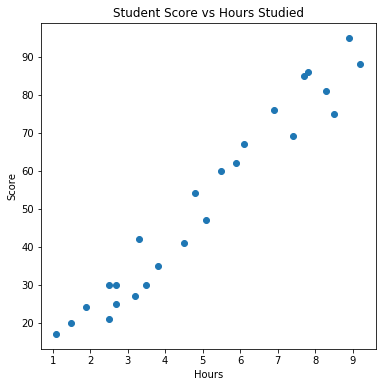

In [12]:
plt.figure(figsize=[6,6])
plt.scatter(x=student_predict['Hours'],y=student_predict['Scores'])
plt.title('Student Score vs Hours Studied')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

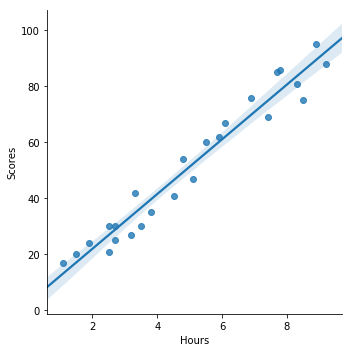

In [15]:
#Using seaborn line plot
sns.lmplot(x='Hours', y='Scores', data=student_predict)

Thus we see a linear flow in this dataset. In any linear graph, there is a dependent and an independent variable. <br>
Here, the <i>Hours</i> put in by the student is the <b>independent variable</b> and the <i>Score</i> the student obtains is the <b>dependent variable</b>. 
<br>We can apply supervised machine learning algorithm in the form of linear regression to this data.

## Applying linear regression model

### 1. Data preparation

In [47]:
# Listing the depended and independent variables seperately

X = student_predict['Hours']
y = student_predict['Scores']

We use the sklearn toolkit to perform train and test data splitting. It is available in the <i>'model_selection'</i>  library.

Typical <b>test size</b> taken is 30% of the dataset. So we will proceed with that.
<br><b>Random state attribute</b> is used to ensure that training data and test data is always the same, no matter how many times we execute below function

In [48]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

### 2. Data training

We use the linear model library in sklearn to perform Linear Regression.
The fitting function is set to LinearRegression()

In [49]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train.values.reshape(-1,1), y_train) 

print("Regression complete.")

Regression complete.


The regressor created contains two attributes, <br>

This is in regards to the linear regression model equation
<br> <center>y = mX + c </center>

Here, <br>
y = Score <br>
x = Hours studied <br>
M = coef_ (attribute of regressor function created) <br>
c = intercept_ (attribute of regressor function created) 

We can use the <b>coef_ and intercept_ </b> values to plot our linear regression line.

In [50]:
print("Coeffecient is " + str(regressor.coef_))
print("Intercept is " + str(regressor.intercept_))

Coeffecient is [9.78856669]
Intercept is 2.370815382341881


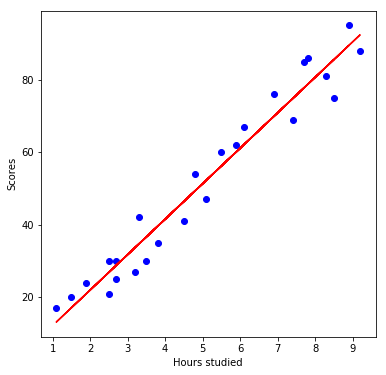

In [56]:
# Plotting the regression line
plt.figure(figsize=[6,6])
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color='b')
plt.plot(X, line,color='r');
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

The <b> blue scatter points  is our original data </b> and the <b> red line is our linear regression fitted line </b>.

### 3. Testing our Model

We can test our newly created linear regression model by obtaining Scores from the <i>X_test</i> values

In [57]:
y_pred = regressor.predict(X_test.values.reshape(-1,1))

regression_result = pd.DataFrame({ 'Actual' : y_test, 'Predicted' : y_pred})

regression_result

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


We see that the actual and predicted values are <b>fairly similar</b>. The difference is due to smaller training dataset. The more training values we can provide to Linear regression model, the more accurate it will be.

### 4. Evaluating our model

#### Error Calculations

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315


As determined in our actual and predicted values scores, there is a slight error in values indicated by these three calculations of Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). <br>

These typically need to be minimised as much as possible, though with our given dataset, this is a good result.

#### R2 Score

In [59]:
print('R2 score :', metrics.r2_score(y_test, y_pred))  

R2 score : 0.9568211104435257


We have further determined the accuracy of our model by calculating the <b> R2 Score </b> <br>
An R2 score of ~96% is excellent and proves that our variable are quite closely dependent on each other. <br>



### <br> Thus Linear Regression model correctly applies on the given dataset for prediction

-----------------------------------------------------------------------------------------------------------

### Q) What will be the predicted score if a student studies 9.25 hours/day?

In [72]:
answer = regressor.predict([[9.25]])

print("Predicted Score = " + str(answer))

Predicted Score = [92.91505723]


### A) If a student studies for 9.25 hours, their score will be 92.